##Importing the libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#unzipping our dataset
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/archive.zip", "r")
zip_ref.extractall()
zip_ref.close()

##Exploratory Data Analysis

In [4]:
df= pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
#a peek into our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#with this function we can check the non-unique values
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
#checking if we have any null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* Since we don't have null values we are proceeding with the rest of
the EDA process.

In [11]:
#the summary of the numerical values
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* Since we can't see object types with describe function, we are gonna use value_counts method to look into our columns and mash it up with a pie chart for better presentation.

## Visualizations

male      676
female    662
Name: sex, dtype: int64


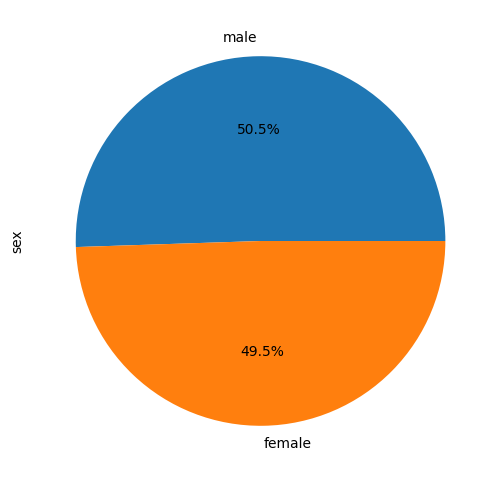

In [12]:
print(df["sex"].value_counts())
df["sex"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(6,6));

no     1064
yes     274
Name: smoker, dtype: int64


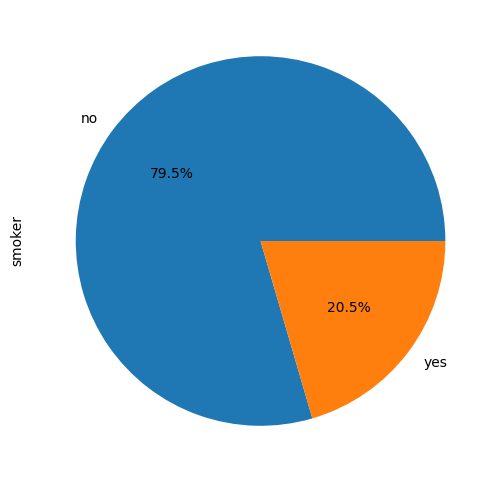

In [13]:
print(df["smoker"].value_counts())
df["smoker"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(6,6));

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


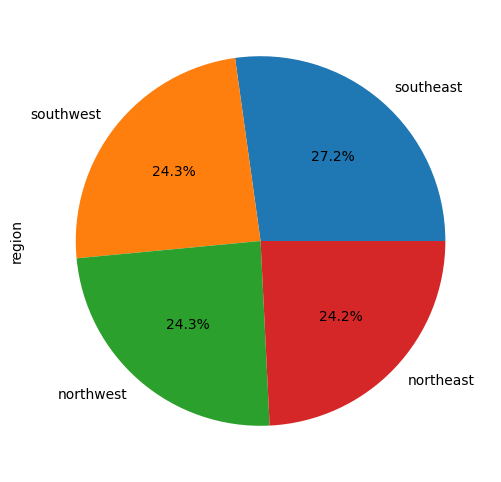

In [14]:
print(df["region"].value_counts())
df["region"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(6,6));

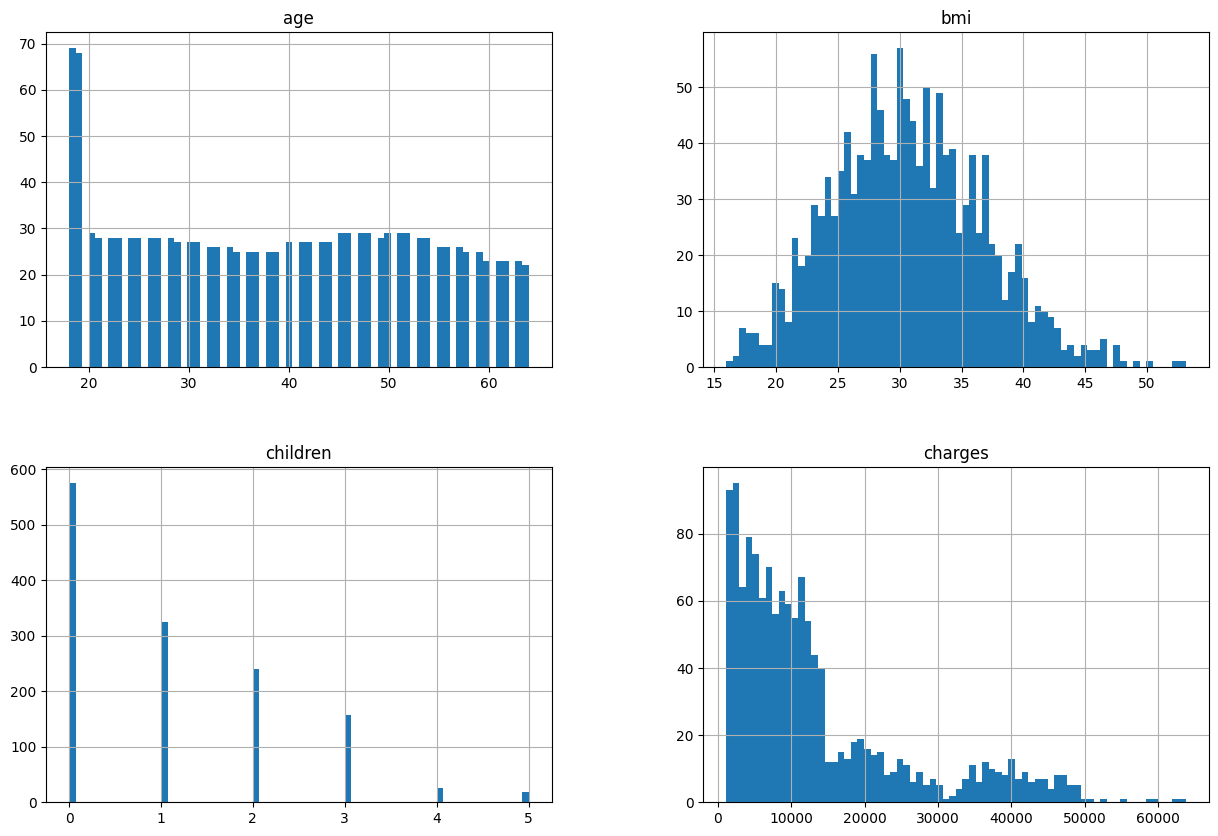

In [15]:
#to look into the numerical attributes we are gonna use histogram
df.hist(bins=70, figsize=(15, 10))
plt.show()

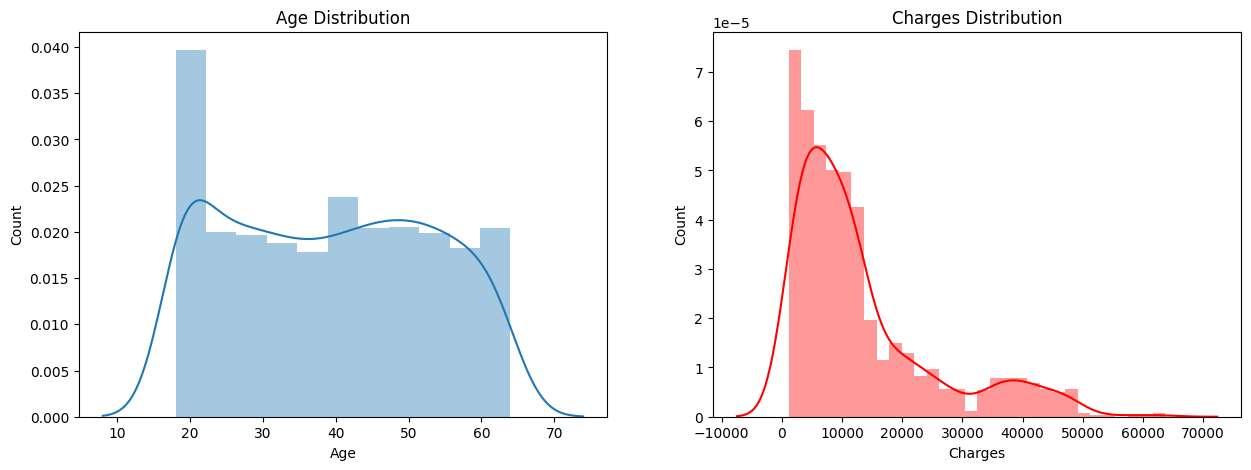

In [16]:
#to see the distribution of our important features we are going to use distplot.
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df.age)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count');

plt.subplot(1,2,2)
sns.distplot(df.charges,color='red')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Count');

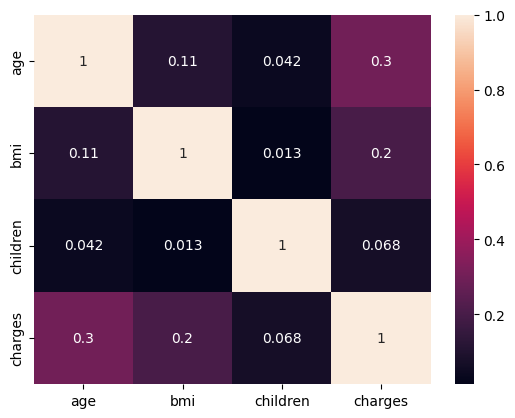

In [17]:
#we are going to plot a heat map to see correlation between our attributes
sns.heatmap(df.corr(), annot =True);

## Multicollinearity Control

In [18]:
# Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other.
# In other words, it's a situation where there's a strong linear relationship between predictor variables.
# This can pose challenges and complications in the analysis of regression models, particularly when the goal is to understand the individual relationships between the predictors and the dependent variable.
# So we are gonna check if we have this problem.

In [19]:
df.corr()[(df.corr()>= 0.9) & (df.corr() < 1)].any().any()

False

In [20]:
df.corr()[(df.corr()<= -0.9) & (df.corr() > -1)].any().any()

False

## Outliers

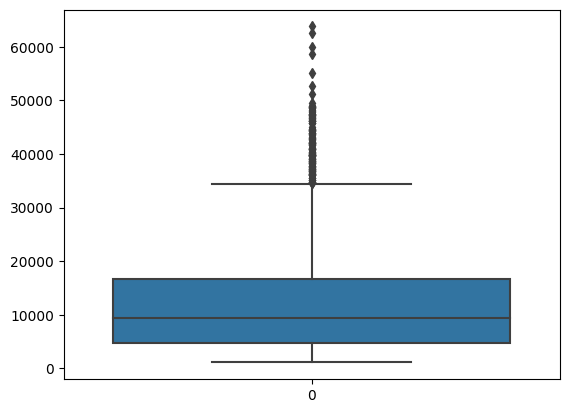

In [21]:
sns.boxplot(df.charges);


As we can see from our boxplot we have a few outliers but since every data is important for us at this point we are not gonna get rid of the outliers.

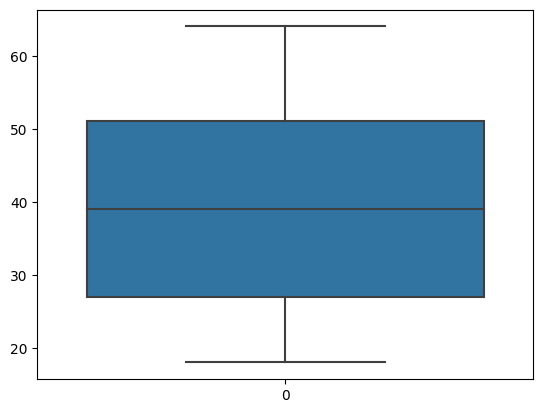

In [22]:
sns.boxplot(df.age);

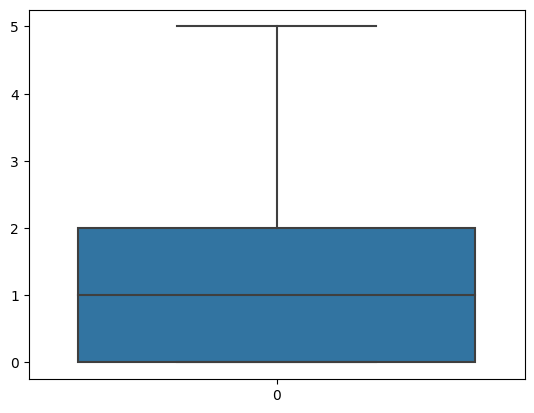

In [23]:
sns.boxplot(df.children);

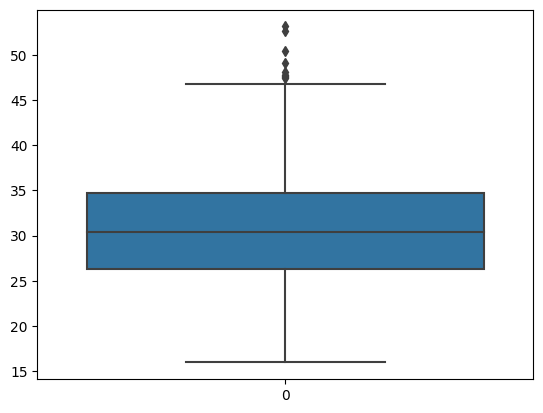

In [24]:
sns.boxplot(df.bmi);

# Pre-processing

In [25]:
#Here we are converting our object features to numerical features to be able to process the date wholly.
label_encoders = {}
for column in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [26]:
#let's check our dataset to see if encoding is fine
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [27]:
#to split our data into train and test, we need to drop our target column, which is in this case "charges"
X=df.drop("charges",axis=1)
y=df["charges"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#checking the shape of our train and test datasets
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (1070, 6)
Train target shape   :  (1070,)
Test features shape  :  (268, 6)
Test target shape    :  (268,)


# Modelling

### Scaling the data

In [30]:
scaler = StandardScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Selection

In [32]:
from sklearn import metrics

In [33]:
# Custom function for cross-validation
def cross_validation_score(model, X, y):
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores.mean()

In [34]:
# Custom function for model performance
def evaluate_performance(actual, predicted):
    rmse = np.sqrt(metrics.mean_squared_error(actual, predicted))
    r2 = metrics.r2_score(actual, predicted)
    return rmse, r2


In [35]:
# Initialize models
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_net = ElasticNet()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
random_forest = RandomForestRegressor(random_state=42)


In [36]:
# Fit models
linear_model = linear_reg.fit(X_train, y_train)
ridge_model = ridge_reg.fit(X_train, y_train)
lasso_model = lasso_reg.fit(X_train, y_train)
elas_model = elastic_net.fit(X_train, y_train)
tree_model = decision_tree.fit(X_train, y_train)
forest_model = random_forest.fit(X_train, y_train)

In [37]:
# Make predictions
linear_predictions = linear_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
elas_predictions = elas_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)
forest_predictions = forest_model.predict(X_test)

In [38]:
# Evaluate model performance and cross-validation
model_results = []

In [39]:
models = [linear_reg, ridge_reg, lasso_reg, elastic_net, decision_tree, random_forest]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'Decision Tree', 'Random Forest']

for model, model_name, preds in zip(models, model_names, [linear_predictions, ridge_predictions, lasso_predictions, elas_predictions, tree_predictions, forest_predictions]):
    rmse, r2 = evaluate_performance(y_test, preds)
    cv_rmse = cross_validation_score(model, X_train, y_train)
    model_results.append([model_name, rmse, r2, cv_rmse])

In [40]:
# Create a DataFrame to store the results
columns = ['Model', 'RMSE', 'R2', 'Cross-Validation RMSE']
results_df = pd.DataFrame(data=model_results, columns=columns)

In [41]:
# Display the results
print(results_df)

                   Model         RMSE        R2  Cross-Validation RMSE
0      Linear Regression  5799.587091  0.783346            6119.833403
1       Ridge Regression  5803.084710  0.783085            6120.165032
2       Lasso Regression  5799.943043  0.783320            6119.665749
3  ElasticNet Regression  9495.187748  0.419264            9456.647496
4          Decision Tree  4776.261075  0.853057            4798.194627
5          Random Forest  4590.573539  0.864261            4990.632709


**Which model should I use?**

* *Linear Regression, Ridge Regression, and Lasso Regression:* They are performing similarly in terms of RMSE and R2, indicating that the regularization in Ridge and Lasso hasn't significantly affected their performance in comparison to plain Linear Regression.
Ridge and Lasso might be more useful if I had more features and I wanted to prevent overfitting or select a subset of important features.

* *ElasticNet Regression:* The higher RMSE and lower R2 compared to other models suggest that ElasticNet Regression might not be the best fit for this data.
ElasticNet is a combination of Ridge and Lasso, but in this case, it might not be providing a significant advantage.

* *Decision Tree:* The lowest RMSE and a relatively high R2 indicate that the Decision Tree model is performing quite well on our data.
Decision Trees can capture complex relationships in the data, but they might be prone to overfitting.

* *Random Forest:* Similar to the Decision Tree, the Random Forest model has a low RMSE and a high R2, indicating good performance.
Random Forests are an ensemble of multiple Decision Trees and generally offer improved generalization by reducing overfitting.


    **Therefore as a safest option I've chosen Random Forest.**

# Model Optimization

## Grid Search

In [42]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [10,20, 30, 40, 50],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [43]:
# Create a base Random Forest model
base_rf = RandomForestRegressor(random_state=42)

In [44]:
# GridSearchCV with cross-validation
grid_search = GridSearchCV(base_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [45]:
# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [46]:
# Get the best model
best_rf_model = grid_search.best_estimator_

In [47]:
# Evaluate the best model on test data
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_rmse, best_rf_r2 = evaluate_performance(y_test, best_rf_predictions)

print("Best Random Forest RMSE:", best_rf_rmse)
print("Best Random Forest R2:", best_rf_r2)

Best Random Forest RMSE: 4390.895804138615
Best Random Forest R2: 0.8758124090448769


## Randomized Search

In [61]:
# Define hyperparameter grid
param_dist = {
    'n_estimators': [10,20, 30, 40, 50],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [62]:
# Create a base Random Forest model
base_rf = RandomForestRegressor(random_state=42)


In [63]:
# RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(base_rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)


In [64]:
# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   random_state=42, scoring='neg_mean_squared_error')

In [65]:
# Get the best model
best_rf_model = random_search.best_estimator_

In [66]:
# Evaluate the best model on test data
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_rmse, best_rf_r2 = evaluate_performance(y_test, best_rf_predictions)

print("Best Random Forest RMSE:", best_rf_rmse)
print("Best Random Forest R2:", best_rf_r2)

Best Random Forest RMSE: 4395.333634320498
Best Random Forest R2: 0.8755612521187477


#### Plotting our results

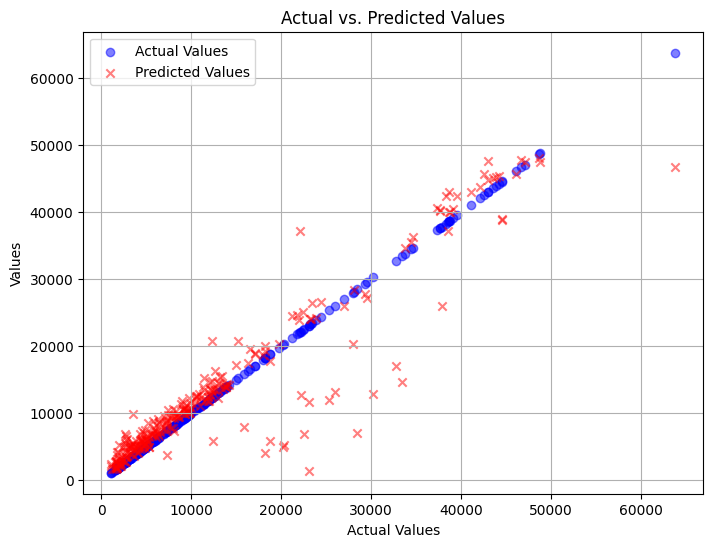

In [73]:
plt.figure(figsize=(8, 6))

# Plot actual values in blue color
plt.scatter(y_test, y_test, label='Actual Values', alpha=0.5, c='b', marker='o')

# Plot predicted values in red color
plt.scatter(y_test, best_rf_predictions, label='Predicted Values', alpha=0.5, c='r', marker='x')

plt.xlabel('Actual Values')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In the end we have gotten the best result with GridSearch. It's important to tune hyperparameters or else computation will be pretty expensive.